<a href="https://colab.research.google.com/github/jpastor1649/Sistemas-Inteligentes-2025-II/blob/main/jpastor_LAB_02_03_PANDAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 02.03 - Pandas

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/fagonzalezo/ai4eng-unal/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L02.03", varname="student");

logging in as jpastor@unal.edu.co... please wait

-------------
using course session ai4eng.v1.unal::intro_si_2025_2
success!! you are logged in
-------------


In [ ]:
pip install "numpy<2.0"

In [ ]:
import numpy as np
import pandas as pd

## Task 1: Extract data

we have a dataframe of items with a price and, **sometimes**, with an extra column (`margin`).

You will have to complete a function that will **filter** the dataframe selecting the rows:

- whose price is > 100
- **OR** whose margin is >10, if the column `margin` is present

your function must return **A LIST** with the item ids of the selected rows

For instance, with the following dataframe

             price  category
    itemid                  
    56556   108.15       2.0
    73065    83.54       2.0
    36619   114.42       0.0
    73414    82.94       0.0
    13410   115.13       2.0
    66153    91.50       1.0
    77380    85.82       0.0
    73249    95.95       0.0
    11654   100.22       2.0
    11972    77.16       1.0

your must return the following list:

     [56556, 36619, 13410, 11654]
     
But if you get the following dataframe

             price  category  margin
    itemid                          
    39059    98.11       0.0   11.04
    19526    98.11       1.0   11.25
    78176    94.34       1.0   10.51
    50948   102.37       1.0   10.77
    12111    98.07       1.0    8.50
    56191    98.53       1.0   11.65
    38887    91.49       2.0   11.24
    77915   117.30       0.0    8.64
    55010    96.13       0.0    8.95
    45925    98.59       1.0   10.45
    
you must return the following list

    [39059, 19526, 78176, 50948, 56191, 38887, 77915, 45925]

In [ ]:
def create_df(missing=False, n=10):
    itemid   = np.random.randint(100000, size=n)+1000
    category = np.random.randint(3, size=n)
    price    = np.round(np.random.normal(loc=100, scale=10, size=n),2)
    margin   = np.round(np.random.normal(loc=10, scale=1, size=n),2)

    if missing:
        nmissing = np.random.randint(len(price)//2)+2
        price[np.random.permutation(len(price))[:nmissing]] = np.nan

    d = pd.DataFrame(np.r_[[price, category, margin]].T, index=itemid, columns=["price", "category", "margin"])
    d.index.name="itemid"
    if np.random.random()>.5:
        d = d[d.columns[:2]]

    return d

In [ ]:
d = create_df()
d

,price,category
itemid,,
1486,109.31,1.0
40589,109.32,1.0
18035,104.79,2.0
24713,107.70,0.0
51887,87.77,1.0
46024,95.21,0.0
15412,96.13,2.0
8524,105.94,1.0
61225,100.97,0.0


In [ ]:
def select_items(df):
    # make sure to make a copy in case you modify the original df
    df = df.copy()
    # condition: price > 100
    cond = df["price"] > 100
    # margin > 10
    if "margin" in df.columns:
        cond |= df["margin"] > 10
    # return items ids
    return df[cond].index.tolist()

**manually check your answer**

In [ ]:
d = create_df()
d

,price,category,margin
itemid,,,
82834,113.37,1.0,8.78
100450,86.00,2.0,11.27
91153,110.50,1.0,11.42
95150,97.12,1.0,10.99
35546,107.10,1.0,11.18
71246,94.61,0.0,9.44
98407,96.97,2.0,9.29
71845,101.38,1.0,9.24
54207,85.38,2.0,9.21


In [ ]:
select_items(d)

[82834, 100450, 91153, 95150, 35546, 71845, 64271]

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Group statistics

Complete the following function so that it returns a dataframe with the average, max and min **prices** per category.

For instance, for the following dataframe

             price  category  margin
    itemid                          
    17946    93.85       1.0   10.64
    61190    91.72       1.0    9.76
    39639   100.16       1.0   10.67
    17791   110.44       2.0    9.65
    7333    101.05       1.0    9.69
    77362   122.33       0.0   11.14
    92646   108.13       2.0   10.58
    27797    85.52       2.0   10.88
    31746    97.56       0.0    9.75
    12355   101.04       2.0    9.51
    
you should return the following dataframe

                 media  maximo  minimo
    categoria                         
    0         109.9450  122.33  97.56
    1          96.6950  101.05  91.72
    2         101.2825  110.44  85.52
    
observe that your result
- must not be a **multilevel** columnset.
- the column names and the index name must be **exactly** as in the example.
- the **index** must be of type **int**.

In [ ]:
def get_stats(df):
    df = df.copy()
    # groupby and aggregate
    result = df.groupby("category")["price"].agg(["mean", "max", "min"])
    # rename columns
    result.columns = ["media", "maximo", "minimo"]
    # rename index and make sure it's int
    result.index.name = "categoria"
    result.index = result.index.astype(int)
    return result


**manually check your answer**

In [ ]:
d = create_df()
d

,price,category
itemid,,
49036,104.75,1.0
46380,94.83,2.0
77442,106.36,0.0
40415,96.75,1.0
95332,87.06,2.0
58606,80.47,1.0
49729,114.51,2.0
79197,86.03,0.0
12762,91.02,1.0


In [ ]:
get_stats(d)

,media,maximo,minimo
categoria,,,
0,96.523333,106.36,86.03
1,93.247500,104.75,80.47
2,98.800000,114.51,87.06


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Fill in missing data

Fill in the missing data in the **price** column with the following procedure:

- compute the mean and std of the avaialable prices
- sample from a normal distribution with the computed mean and std (see [`np.random.normal`])(https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html), as many samples as missing data
- substitute the missing values with the samples

For instance, for this input dataframe:

             price  category  margin
    itemid                          
    18922      NaN       1.0   10.32
    69500   121.25       1.0   10.22
    76442    90.25       1.0   12.60
    33863   106.51       0.0   10.26
    15904    95.87       1.0   11.51
    41946   103.47       2.0    9.85
    85451    93.08       2.0    9.56
    70028   116.68       1.0    9.11
    26860      NaN       2.0    9.71
    12807    91.48       0.0    9.77
    
your solution might be similar to this (not exactly the same as you will be sampling data):


                 price  category  margin
    itemid                              
    18922    97.441188       1.0   10.32
    69500   121.250000       1.0   10.22
    76442    90.250000       1.0   12.60
    33863   106.510000       0.0   10.26
    15904    95.870000       1.0   11.51
    41946   103.470000       2.0    9.85
    85451    93.080000       2.0    9.56
    70028   116.680000       1.0    9.11
    26860   103.294843       2.0    9.71
    12807    91.480000       0.0    9.77
    
    
**WARN**: your function must not modify the original dataframe, make a copy of the input dataframe, fill the values in the copy and return it.

**HINT**: use the [`isna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html) method of a dataframe or a series.

In [ ]:
d = create_df(missing=True)
d

,price,category,margin
itemid,,,
100958,NaN,1.0,12.80
100067,NaN,0.0,10.78
86623,111.10,1.0,11.00
13999,116.43,0.0,9.23
12875,112.02,2.0,9.85
21556,100.82,0.0,11.43
20500,100.72,0.0,11.17
79006,105.87,1.0,12.00
15905,NaN,0.0,10.86


In [ ]:
def fillna(df):
    # make sure to make a copy in case you modify the original df
    df = df.copy()

    # compute mean and std from available prices
    mean = df["price"].mean(skipna=True)
    std  = df["price"].std(skipna=True)

    # find missing indices
    missing_idx = df["price"].isna()
    n_missing = missing_idx.sum()

    if n_missing > 0:
        samples = np.random.normal(mean, std, n_missing)
        df.loc[missing_idx, "price"] = samples

    return df

**check manually your code**

In [ ]:
d = create_df(missing=True)
d

,price,category,margin
itemid,,,
44779,NaN,0.0,11.18
64870,93.94,1.0,9.77
48684,88.25,0.0,9.95
52918,82.07,1.0,10.13
75904,NaN,1.0,9.01
75180,97.16,1.0,10.91
93693,110.66,2.0,10.83
74217,107.81,0.0,10.23
5304,106.98,0.0,10.80


In [ ]:
fillna(d)

,price,category,margin
itemid,,,
44779,101.052687,0.0,11.18
64870,93.940000,1.0,9.77
48684,88.250000,0.0,9.95
52918,82.070000,1.0,10.13
75904,87.267168,1.0,9.01
75180,97.160000,1.0,10.91
93693,110.660000,2.0,10.83
74217,107.810000,0.0,10.23
5304,106.980000,0.0,10.80


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");

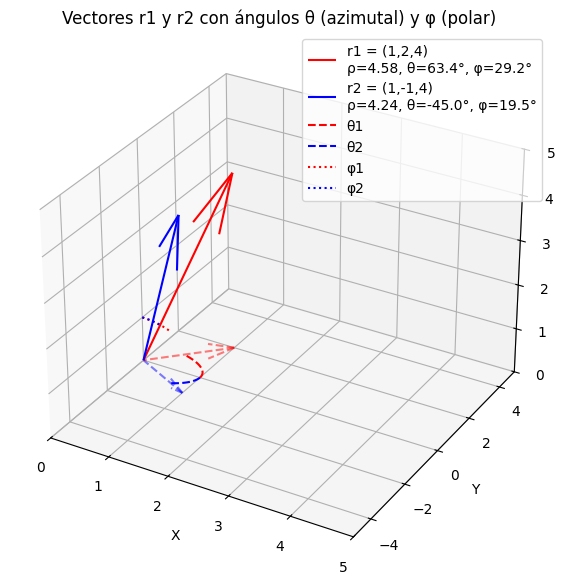

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Vectores
r1 = np.array([1, 2, 4])
r2 = np.array([1, -1, 4])

# Magnitudes
rho1 = np.linalg.norm(r1)
rho2 = np.linalg.norm(r2)

# Ángulos
theta1 = np.degrees(np.arctan2(r1[1], r1[0]))
theta2 = np.degrees(np.arctan2(r2[1], r2[0]))
phi1 = np.degrees(np.arccos(r1[2] / rho1))
phi2 = np.degrees(np.arccos(r2[2] / rho2))

# Crear figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Dibujar vectores
ax.quiver(0,0,0, *r1, color='r', label=f"r1 = (1,2,4)\nρ={rho1:.2f}, θ={theta1:.1f}°, φ={phi1:.1f}°")
ax.quiver(0,0,0, *r2, color='b', label=f"r2 = (1,-1,4)\nρ={rho2:.2f}, θ={theta2:.1f}°, φ={phi2:.1f}°")

# Proyecciones en el plano XY
ax.quiver(0,0,0, r1[0], r1[1], 0, color='r', linestyle='dashed', alpha=0.5)
ax.quiver(0,0,0, r2[0], r2[1], 0, color='b', linestyle='dashed', alpha=0.5)

# Dibujar arcos para θ (en plano XY)
t1 = np.linspace(0, np.radians(theta1), 100)
arc1 = np.array([np.cos(t1), np.sin(t1), np.zeros_like(t1)])
ax.plot(arc1[0], arc1[1], arc1[2], 'r--', label="θ1")

t2 = np.linspace(0, np.radians(theta2), 100)
arc2 = np.array([np.cos(t2), np.sin(t2), np.zeros_like(t2)])
ax.plot(arc2[0], arc2[1], arc2[2], 'b--', label="θ2")

# Dibujar arcos para φ (desde z hasta vector)
phi_arc1 = np.linspace(0, np.radians(phi1), 100)
arc_phi1 = np.array([np.sin(phi_arc1), np.zeros_like(phi_arc1), np.cos(phi_arc1)])
ax.plot(arc_phi1[0], arc_phi1[1], arc_phi1[2], 'r:', label="φ1")

phi_arc2 = np.linspace(0, np.radians(phi2), 100)
arc_phi2 = np.array([np.sin(phi_arc2), np.zeros_like(phi_arc2), np.cos(phi_arc2)])
ax.plot(arc_phi2[0], arc_phi2[1], arc_phi2[2], 'b:', label="φ2")

# Ajustes
ax.set_xlim([0, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([0, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title("Vectores r1 y r2 con ángulos θ (azimutal) y φ (polar)")

plt.show()


In [ ]:
import yfinance as yf
import pandas as pd

tickers = [
    "^GSPC"
]

start_date = "2020-11-14"
end_date = "2025-11-24"

# Crea un archivo Excel con varias hojas
with pd.ExcelWriter("Acciones_Completas.xlsx", engine="openpyxl") as writer:
    for t in tickers:
        print(f"Descargando {t}...")
        data = yf.download(t, start=start_date, end=end_date, interval="1mo")

        # Ordenar del más reciente al más antiguo
        data = data.sort_index(ascending=False)

        # Guardar en hoja separada
        data.to_excel(writer, sheet_name=t)

print("Archivo generado: Acciones_Completas.xlsx")


Descargando ^GSPC...


/tmp/ipython-input-2193748259.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start=start_date, end=end_date, interval="1mo")
[*********************100%***********************]  1 of 1 completed

Archivo generado: Acciones_Completas.xlsx


In [ ]:
import yfinance as yf
import pandas as pd

tickers = [
    "AMZN", "KO", "PFE", "INTC", "NKE",
    "NVDA", "AAPL", "TSLA", "JNJ", "MSFT"
]

start = "2020-11-01"
end   = "2020-11-05"   # ventana pequeña para aislar primeros días

resultados = {}

for t in tickers:
    data = yf.download(t, start=start, end=end, interval="1d")

    # Primer día hábil = el primer índice disponible
    primer_dia = data.index.min()
    close_value = data.loc[primer_dia]["Close"]

    resultados[t] = {
        "Fecha usada": primer_dia.strftime("%Y-%m-%d"),
        "Close": close_value
    }

# Mostrar resultados
for t, info in resultados.items():
    print(f"{t}: Close {info['Close']} (fecha: {info['Fecha usada']})")


/tmp/ipython-input-1472713663.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1472713663.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1472713663.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1472713663.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(t, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1

AMZN: Close Ticker
AMZN    150.223999
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
KO: Close Ticker
KO    41.7962
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
PFE: Close Ticker
PFE    26.659868
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
INTC: Close Ticker
INTC    39.902729
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
NKE: Close Ticker
NKE    114.470558
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
NVDA: Close Ticker
NVDA    12.542461
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
AAPL: Close Ticker
AAPL    105.700035
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
TSLA: Close Ticker
TSLA    133.503326
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
JNJ: Close Ticker
JNJ    120.254265
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
MSFT: Close Ticker
MSFT    193.636734
Name: 2020-11-02 00:00:00, dtype: float64 (fecha: 2020-11-02)
